# Census Income Project

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Description of dataset

##### Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

###### Independent Variables:

- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Loading Database

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/loan_prediction.csv')
df.shape

# (614, 13)

(614, 13)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [4]:
df.head()  # top 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.sample()  # random one row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
433,LP002387,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Information about dataset

In [7]:
df.info()

# #   Column             Non-Null Count  Dtype  
# ---  ------             --------------  -----  
#  0   Loan_ID            614 non-null    object 
#  1   Gender             601 non-null    object 
#  2   Married            611 non-null    object 
#  3   Dependents         599 non-null    object 
#  4   Education          614 non-null    object 
#  5   Self_Employed      582 non-null    object 
#  6   ApplicantIncome    614 non-null    int64  
#  7   CoapplicantIncome  614 non-null    float64
#  8   LoanAmount         592 non-null    float64
#  9   Loan_Amount_Term   600 non-null    float64
#  10  Credit_History     564 non-null    float64
#  11  Property_Area      614 non-null    object 
#  12  Loan_Status        614 non-null    object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# All columns are not containing equal non null value, which mean data have some null value
# need to work on that

## Null value checking 

In [9]:
df.isnull().sum()

# Loan_ID               0
# Gender               13
# Married               3
# Dependents           15
# Education             0
# Self_Employed        32
# ApplicantIncome       0
# CoapplicantIncome     0
# LoanAmount           22
# Loan_Amount_Term     14
# Credit_History       50
# Property_Area         0
# Loan_Status           0

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum().sum()

# 149

149

<AxesSubplot:>

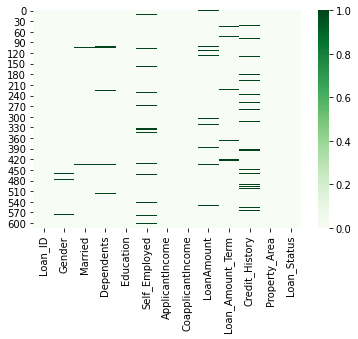

In [11]:
sns.heatmap(df.isnull(), cmap = 'Greens')

In [12]:
# Heatmap is not clear, means  null point present in the dataset 

In [13]:
# Percentage of Null value of columns

In [14]:
null_percentage = df.isnull().sum() / df.shape[0] * 100
null_percentage 

# Loan_ID              0.000000
# Gender               2.117264
# Married              0.488599
# Dependents           2.442997
# Education            0.000000
# Self_Employed        5.211726
# ApplicantIncome      0.000000
# CoapplicantIncome    0.000000
# LoanAmount           3.583062
# Loan_Amount_Term     2.280130
# Credit_History       8.143322
# Property_Area        0.000000
# Loan_Status          0.000000

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
# Gender               2.117264
# Married              0.488599
# Dependents           2.442997
# Self_Employed        5.211726
# LoanAmount           3.583062
# Loan_Amount_Term     2.280130
# Credit_History       8.143322

# Percentage of null values of columns are not containing much percentage of null value and we can fill these value
# by applying Mean, median and mode operation accordingly 

In [16]:
df.dtypes

# Loan_ID               object
# Gender                object
# Married               object
# Dependents            object
# Education             object
# Self_Employed         object
# ApplicantIncome        int64
# CoapplicantIncome    float64
# LoanAmount           float64
# Loan_Amount_Term     float64
# Credit_History       float64
# Property_Area         object
# Loan_Status           object

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Applying mode imputation on categorical columns for Null values

In [17]:
object_col = df.select_dtypes(include = ['object']).keys()
object_col

# Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'Property_Area', 'Loan_Status'],
#       dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
null_percentage

# Loan_ID              0.000000
# Gender               2.117264
# Married              0.488599
# Dependents           2.442997
# Education            0.000000
# Self_Employed        5.211726
# ApplicantIncome      0.000000
# CoapplicantIncome    0.000000
# LoanAmount           3.583062
# Loan_Amount_Term     2.280130
# Credit_History       8.143322
# Property_Area        0.000000
# Loan_Status          0.000000

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
for i in object_col: 
    print(i, ':', df[i].isnull().sum())

# Loan_ID : 0
# Gender : 13
# Married : 3
# Dependents : 15
# Education : 0
# Self_Employed : 32
# Property_Area : 0
# Loan_Status : 0

Loan_ID : 0
Gender : 13
Married : 3
Dependents : 15
Education : 0
Self_Employed : 32
Property_Area : 0
Loan_Status : 0


In [20]:
# Gender column containing 2.11 percent null values
# Married Column containing 0.48 percent null values
# Dependents column containing 2.44 percent null values
# Self_Employed column is containing 5.21 percent null values

In [21]:
df['Gender']= df['Gender'].fillna (df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [22]:
for i in object_col: 
    print(i, ':', df[i].isnull().sum())
    
# Loan_ID : 0
# Gender : 0
# Married : 0
# Dependents : 0
# Education : 0
# Self_Employed : 0
# Property_Area : 0
# Loan_Status : 0

Loan_ID : 0
Gender : 0
Married : 0
Dependents : 0
Education : 0
Self_Employed : 0
Property_Area : 0
Loan_Status : 0


In [23]:
# All null values ofobject type columns has been replace with mode of that column and now, 
# object type columns are not having any null value

In [24]:
df.dtypes

# Loan_ID               object
# Gender                object
# Married               object
# Dependents            object
# Education             object
# Self_Employed         object
# ApplicantIncome        int64
# CoapplicantIncome    float64
# LoanAmount           float64
# Loan_Amount_Term     float64
# Credit_History       float64
# Property_Area         object
# Loan_Status           object

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
df['ApplicantIncome']= df['ApplicantIncome'].astype('float64')
df.dtypes

# Loan_ID               object
# Gender                object
# Married               object
# Dependents            object
# Education             object
# Self_Employed         object
# ApplicantIncome      float64
# CoapplicantIncome    float64
# LoanAmount           float64
# Loan_Amount_Term     float64
# Credit_History       float64
# Property_Area         object
# Loan_Status           object

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
float_type = df.select_dtypes(include = ['float64']).keys()
float_type

# Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History'],
#       dtype='object')

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [27]:
df.isnull().sum()

# LoanAmount           22
# Loan_Amount_Term     14
# Credit_History       50

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# LoanAmount           22
# Loan_Amount_Term     14
# Credit_History       50
# Only three float type columns are containing null values

# For selection mean or Median imputation we need distribution of these column
# if column is normally distributed then mean will be better approch, 
# and if column is not normally distributed then median will be better approch
# we will try both technique then will visualize it

In [29]:
mean_df = df.copy()
median_df = df.copy()

In [30]:
# Mean imputation
mean_df['LoanAmount'] = mean_df['LoanAmount'].fillna(mean_df['LoanAmount'].mean())
mean_df['Loan_Amount_Term'] = mean_df['Loan_Amount_Term'].fillna(mean_df['Loan_Amount_Term'].mean())
mean_df['Credit_History'] = mean_df['Credit_History'].fillna(mean_df['Credit_History'].mean())

In [31]:
mean_df.isnull().sum().sum()
# 0

0

In [32]:
# Median Imputation
median_df['LoanAmount'] = median_df['LoanAmount'].fillna(median_df['LoanAmount'].median())
median_df['Loan_Amount_Term'] = median_df['Loan_Amount_Term'].fillna(median_df['Loan_Amount_Term'].median())
median_df['Credit_History'] = median_df['Credit_History'].fillna(median_df['Credit_History'].median())

In [33]:
median_df.isnull().sum().sum()
# 0

0

#### Visualisation of Imputed mean and median 

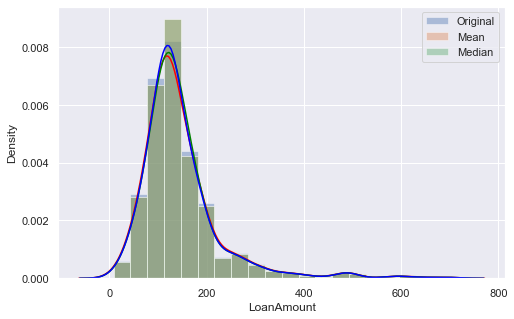

In [34]:
plt.figure(figsize = (8, 5))
sns.set()
   
sns.distplot(df['LoanAmount'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_df['LoanAmount'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_df['LoanAmount'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()

In [35]:
# We can see in above visualization, impact of mean  and median imputation
# Median operation is giving output which is much towards in original distribution of column
# therefore median operation will be good here

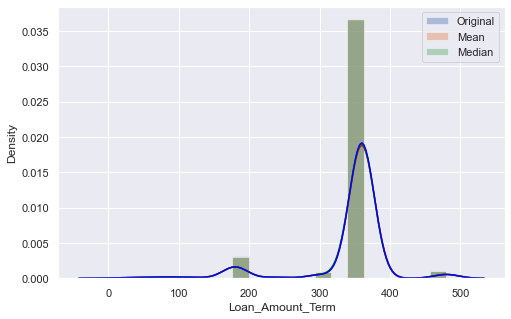

In [36]:
plt.figure(figsize = (8, 5))
sns.set()
   
sns.distplot(df['Loan_Amount_Term'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_df['Loan_Amount_Term'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_df['Loan_Amount_Term'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()


In [37]:
# No difference found in mean and median imputation, 
# but column is not normally distributed therefore, we will consider median for imputation 

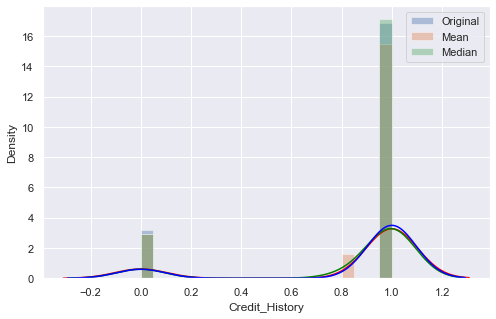

In [38]:
plt.figure(figsize = (8, 5))
sns.set()
   
sns.distplot(df['Credit_History'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_df['Credit_History'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_df['Credit_History'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()


In [39]:
# Very narrow difference in mean and median imputation, 
# again as column is not normally distributed therefore we will apply median operation to impute

##### Applying median imputation on Original dataset

In [40]:
df.isnull().sum()
# Loan_ID               0
# Gender                0
# Married               0
# Dependents            0
# Education             0
# Self_Employed         0
# ApplicantIncome       0
# CoapplicantIncome     0
# LoanAmount           22
# Loan_Amount_Term     14
# Credit_History       50
# Property_Area         0
# Loan_Status           0

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# Median Imputation
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [42]:
df.isnull().sum().sum()# All null values has been replace with mean, median or mode as per their columns dtypes
# 0

0

<AxesSubplot:>

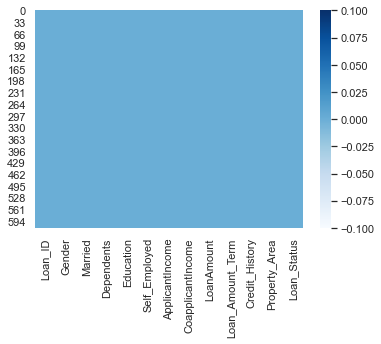

In [43]:
sns.heatmap(df.isnull(), cmap = 'Blues')

# Now, heatmpa is clean , which telling that, now no null value present in the dataset

## Data Preprocessing

#### Deleting columns which are not necessary for Training the model

In [44]:
object_col

# Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'Property_Area', 'Loan_Status'],
#       dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
# value count of categorical columns
for i in object_col[1:]:
    print( '------------------------------',i, ' column------------------------')
    print(df[i].value_counts())

------------------------------ Gender  column------------------------
Male      502
Female    112
Name: Gender, dtype: int64
------------------------------ Married  column------------------------
Yes    401
No     213
Name: Married, dtype: int64
------------------------------ Dependents  column------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
------------------------------ Education  column------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------ Self_Employed  column------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
------------------------------ Property_Area  column------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
------------------------------ Loan_Status  column------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64


In [46]:
# No of unique work in categorical columns
for i in object_col[1:]:
    print( '-------',i, ' column------------------------')
    print(df[i].nunique())
    
# ------- Gender  column------------------------
# 2
# ------- Married  column------------------------
# 2
# ------- Dependents  column------------------------
# 4
# ------- Education  column------------------------
# 2
# ------- Self_Employed  column------------------------
# 2
# ------- Property_Area  column------------------------
# 3
# ------- Loan_Status  column------------------------
# 2

------- Gender  column------------------------
2
------- Married  column------------------------
2
------- Dependents  column------------------------
4
------- Education  column------------------------
2
------- Self_Employed  column------------------------
2
------- Property_Area  column------------------------
3
------- Loan_Status  column------------------------
2


In [47]:
df.columns

# Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
#       dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
# as we know loan id is nothing just a unique number of custmer, 
# it do not contributing to predict our target variables (Loan Status)
# Therefore, we should delete this column
df.shape
# (614, 13)

(614, 13)

In [49]:
df.drop(columns = ['Loan_ID'], inplace=True)

In [50]:
df.shape
# (614, 12)

(614, 12)

In [51]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
df['Credit_History'].value_counts()
# As we can see, in this column only type of values are present 1.0 and 0.0 
# where 1.0 denoting Person having Credit history wherease 0.0 is denoting person is not having any Credit history
# therefore we will apply operation of Cetegorical columns on this column

1.0    525
0.0     89
Name: Credit_History, dtype: int64

## Visualization

### For Categorical columns

In [53]:
object_col = df.select_dtypes(include = ['object']).keys()
object_col

# Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#        'Property_Area', 'Loan_Status'],
#       dtype='object')

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
object_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
object_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

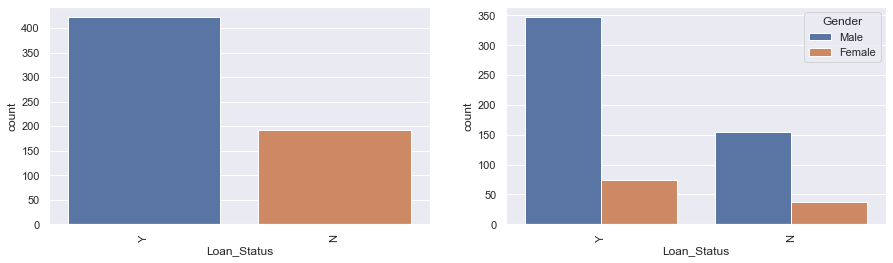

In [55]:
plt.figure(figsize= (15, 4))
l = list(df.Loan_Status.unique())
plt.subplot(1,2, 1)
bar = sns.countplot(df['Loan_Status'])
bar.set_xticklabels(labels = l, rotation = 90)

plt.subplot(1,2, 2)
bar1 = sns.countplot(df['Loan_Status'], hue = df['Gender'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [56]:
# maximum operation of Yes Loan Status, Need to balance the data for building ML model
# Majority is of male candidates who are applying for loan

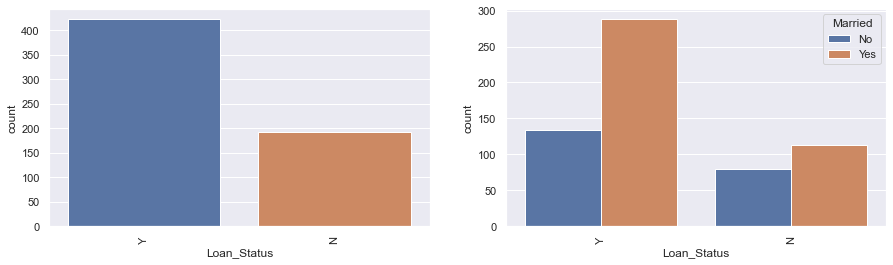

In [57]:
plt.figure(figsize= (15, 4))
l = list(df.Loan_Status.unique())
plt.subplot(1,2, 1)
bar = sns.countplot(df['Loan_Status'])
bar.set_xticklabels(labels = l, rotation = 90)

plt.subplot(1,2, 2)
bar1 = sns.countplot(df['Loan_Status'], hue = df['Married'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [58]:
# As per visualisation, maxium married persons are getting loan status as YES (loan approve) 
# May be married person consider as more responsible as compare to unmarried person

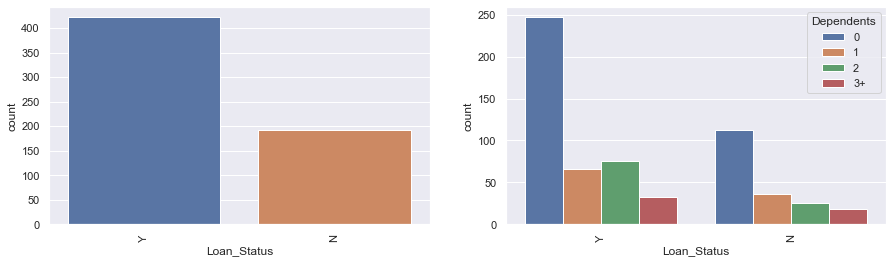

In [59]:
plt.figure(figsize= (15, 4))
l = list(df.Loan_Status.unique())
plt.subplot(1,2, 1)
bar = sns.countplot(df['Loan_Status'])
bar.set_xticklabels(labels = l, rotation = 90)

plt.subplot(1,2, 2)
bar1 = sns.countplot(df['Loan_Status'], hue = df['Dependents'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [60]:
# If a person having less dependents then laon status may get Yes with more possible chances

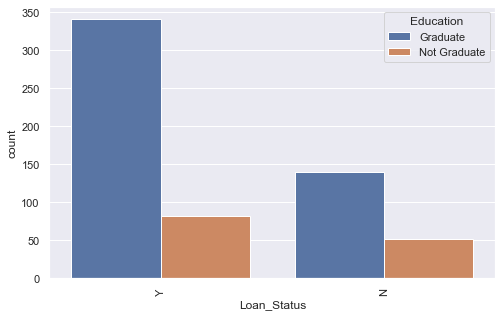

In [61]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(df['Loan_Status'], hue = df['Education'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [62]:
# We found by this graph, if person is graduate then chance are increasing to get approval of laon 

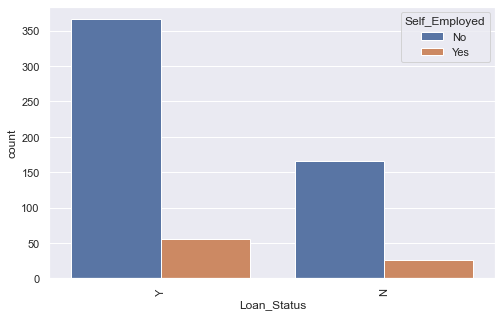

In [63]:
plt.figure(figsize = (8,5) )
bar1 = sns.countplot(df['Loan_Status'], hue = df['Self_Employed'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [64]:
# We can see the graph of Non self employeed person , their graph ration say that if a person is self employed then chances
# to get approval of loan status is higher as compare to a Self employeed person

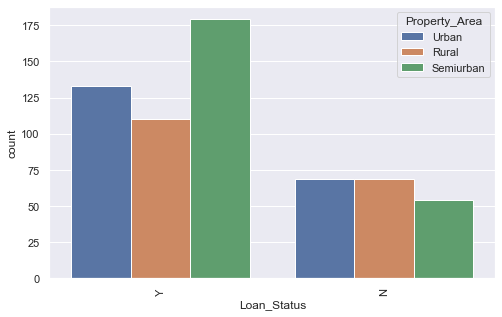

In [65]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(df['Loan_Status'], hue = df['Property_Area'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [66]:
# Person whose property area is in semiurban then their loan approval chances are higher as compare to urban living and rural 
# living

In [67]:
object_col

# Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#        'Property_Area', 'Loan_Status'],
#       dtype='object')

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

<AxesSubplot:ylabel='Loan_Status'>

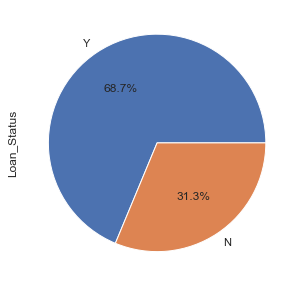

In [68]:
# We can see percentage of laon approval or rejection 
plt.figure(figsize = (8, 5))
df['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [69]:
# As we can see, 68.7 percent application are having Loan status as YES
# And 31.3 are haviing Loan status as NO


<AxesSubplot:ylabel='Gender'>

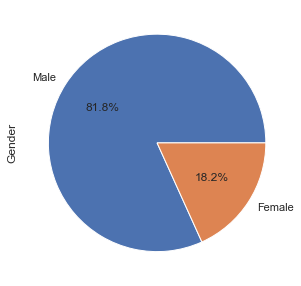

In [70]:
# We can see percentage of Male Vs Female
plt.figure(figsize = (8, 5))
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [71]:
# Male population percentage (81.8%) is higher then female population percentage (18.2%) 
# As male candidates applications are higher in number as compaer to female candidate applications

<AxesSubplot:ylabel='Married'>

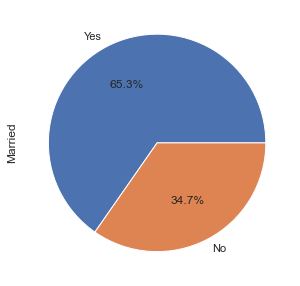

In [72]:
# We can see percentage of each columns classes
plt.figure(figsize = (8, 5))
df['Married'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [73]:
# As we can see no. of application of married person is higher than unmarried person
# Married (65.3%)
# Unmarried (34.7%)

<AxesSubplot:ylabel='Dependents'>

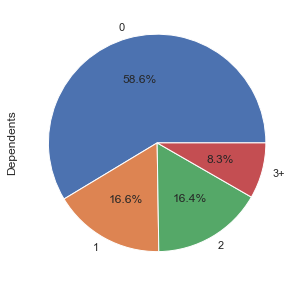

In [74]:
# We can see percentage of Dependents applications
plt.figure(figsize = (8, 5))
df['Dependents'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [75]:
# Only 8.3 % applications are for those persons who are having 3+ dependents
# 58.6 % applicatioin are for those persons who are not having any dependents,

<AxesSubplot:ylabel='Education'>

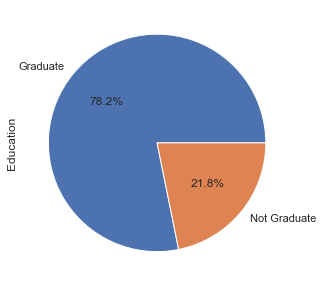

In [76]:
# We can see percentage of Education classes
plt.figure(figsize = (8, 5))
df['Education'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [77]:
# Maximum applications are of those person who are Graduate (78%)
# Less applications are received from those person who are Not Graduate (21%)

<AxesSubplot:ylabel='Self_Employed'>

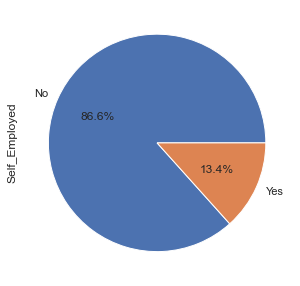

In [78]:
# We can see percentage of Self_Employed classes
plt.figure(figsize = (8, 5))
df['Self_Employed'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [79]:
# Very less application are received from those person who are self employed, which means self employed person are more
# stable , thatwhy they dont require loan etc

<AxesSubplot:ylabel='Property_Area'>

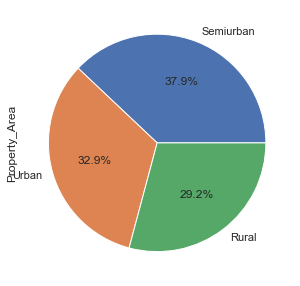

In [80]:
# We can see percentage of Self_Employed classes
plt.figure(figsize = (8, 5))
df['Property_Area'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [81]:
# 37 percent applications are received from Semiurban living peoples
# Rural living persons application are less as compare to other type of Property area

In [82]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [83]:
object_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

#### For Education Column

In [84]:
Graduate = df[df['Education'] == 'Graduate'  ]
Non_Graduate = df[df['Education'] == 'Not Graduate'  ]

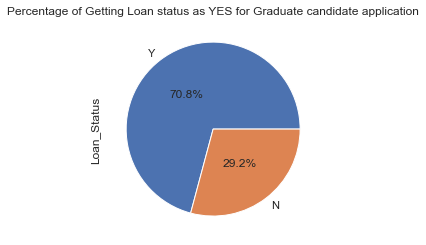

In [85]:
Graduate['Loan_Status'].value_counts().plot(kind='pie',  autopct='%.1f%%', pctdistance=0.5)
plt.title('Percentage of Getting Loan status as YES for Graduate candidate application')
plt.show()

In [86]:
# In Graduate person application, 70.8% applications have been approved (Loan status as YES)

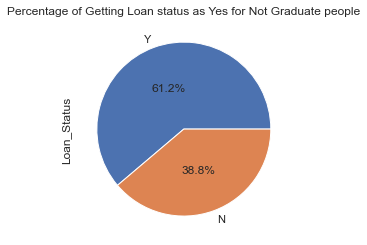

In [87]:
Non_Graduate['Loan_Status'].value_counts().plot(kind='pie',  autopct='%.1f%%', pctdistance=0.5)
plt.title('Percentage of Getting Loan status as Yes for Not Graduate people')
plt.show()

In [88]:
# In both above visualisation of of Graduate and Non Graduate candidate application
# If a person is Graduate then Application of Loan may be approve with  70.8 % chances
# Wherease if person is Not Graduate then there is only 61.2% chances to get Loan status as yes
# Mean, if Application of Graduate person come then their will be greater chance to approve as compare to Non Graduate applicatioin

In [89]:
object_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

#### For Married Column 

In [90]:
married_yes = df[df['Married'] == 'Yes']
married_no = df[df['Married'] == 'No']

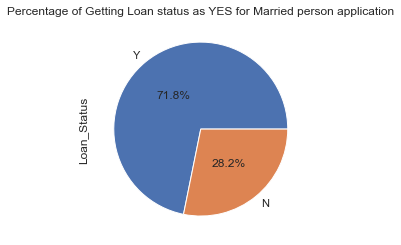

In [91]:
married_yes['Loan_Status'].value_counts().plot(kind='pie',  autopct='%.1f%%', pctdistance=0.5)
plt.title('Percentage of Getting Loan status as YES for Married person application')
plt.show()

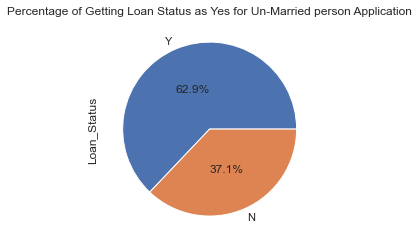

In [92]:
married_no['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)
plt.title('Percentage of Getting Loan Status as Yes for Un-Married person Application')
plt.show()

In [93]:
# By Both above graph we can see the difference in Loan status percentage
# if a person is married then there is 71.8% chances to get Loan status as YES
# and if person is Un-married then there is 62.9% chances to get loan status as NO

#### For Credit History Column

In [94]:
df.columns
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [95]:
credit_history_yes = df[df['Credit_History'] == 1.0]
credit_history_no = df[df['Credit_History']==0.0]

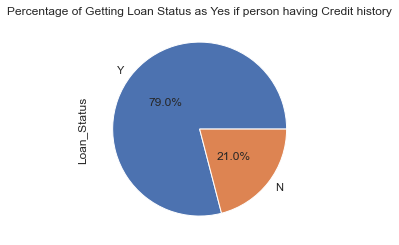

In [96]:
credit_history_yes['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)
plt.title('Percentage of Getting Loan Status as Yes if person having Credit history')
plt.show()

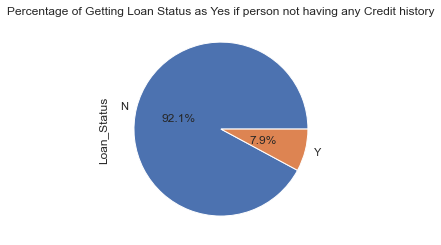

In [97]:
credit_history_no['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)
plt.title('Percentage of Getting Loan Status as Yes if person not having any Credit history')
plt.show()

In [98]:
# As we can see of both pie chart of Credit history column, 
# if person having credit history as yes then chance are less to get Loan status as Yes
# wherease if person not having any credit history then high chance of getting loan status as yes
# Credit history playing a vital role to predict loan status

In [99]:
object_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

#### For Property_Area Column

In [100]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [101]:
Semiurban = df[df.Property_Area == 'Semiurban']
Urban = df[df.Property_Area == 'Urban']
Rural = df[df.Property_Area == 'Rural']

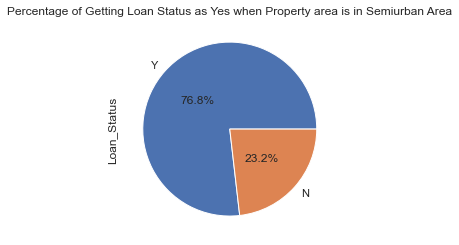

In [102]:
Semiurban['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)
plt.title('Percentage of Getting Loan Status as Yes when Property area is in Semiurban Area')
plt.show()

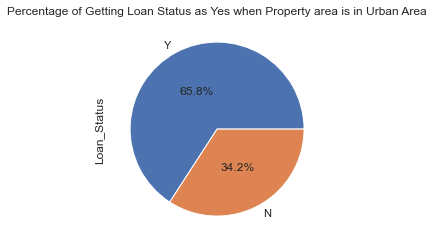

In [103]:
Urban['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)
plt.title('Percentage of Getting Loan Status as Yes when Property area is in Urban Area')
plt.show()

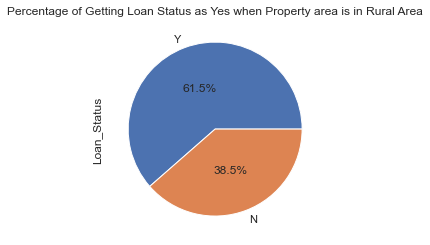

In [104]:
Rural['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)
plt.title('Percentage of Getting Loan Status as Yes when Property area is in Rural Area')
plt.show()

In [105]:
# By three above Pie chart
# If a candidate is having property_area in Semiurban area then 76.8 % chances are to getting Loan Status as Yes
# where if candiate is havinig property area in urban then 65.8% chances are to geting Loan Status as Yes
# when candidate is having property_area in Rural area then 61.5% chances are to getting Loan Status as Yes 

In [106]:
print(object_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']


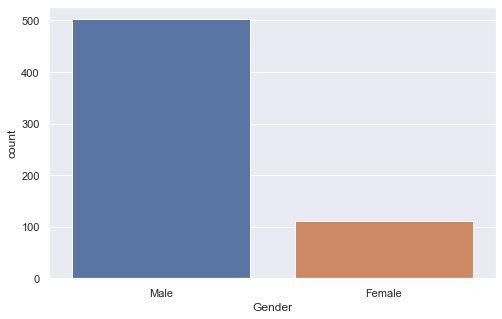

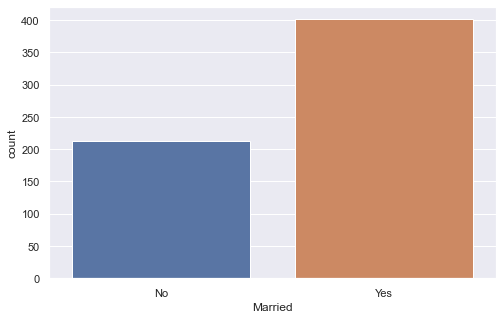

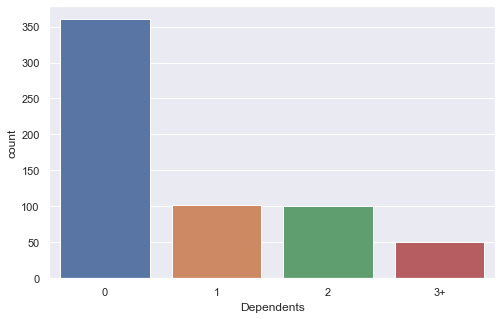

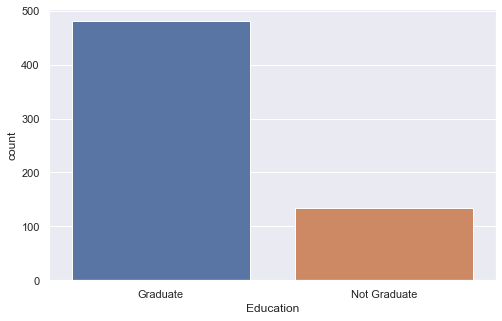

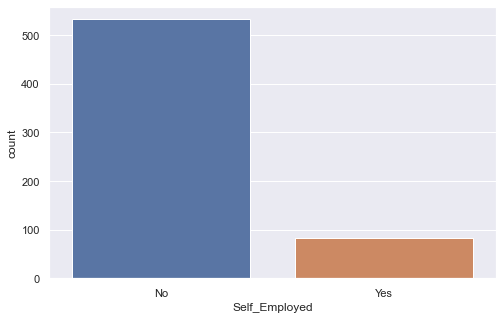

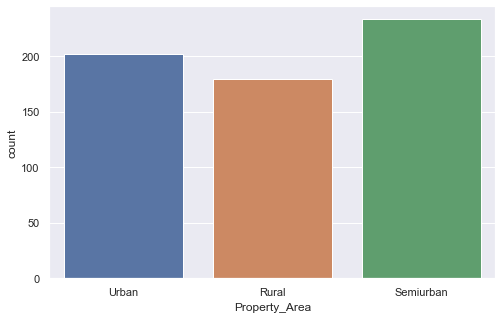

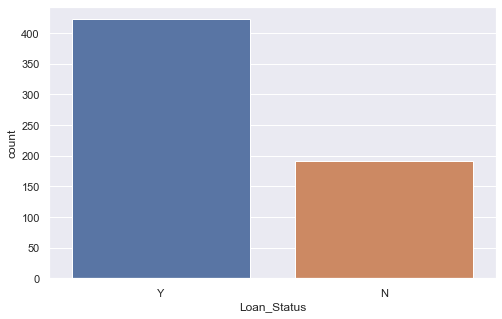

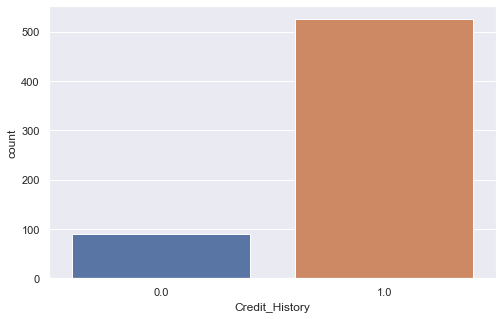

In [107]:
for i in object_col:
    plt.figure(figsize = (8,5) )
    bar1 = sns.countplot(df[i],)

In [108]:
# 1. Gender:
# male candidate application are greater than Female candidate application 

# 2. Married :
# maximum application are come from Married person

# 3. Dependents :
# Maximum application are received from those person who is not having any dependents

# 4. Education
# Maxium applications are received from Gradute person

# 5. Self Employed
# less application are received from person who is not self employed

# 6. Property_Area
# Maximum application are received from Semiurban Locality

# 7. Credit history
# maximum person havinig credit history

### For int Columns

In [109]:
float_type = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' ]


### Checking Ouliers

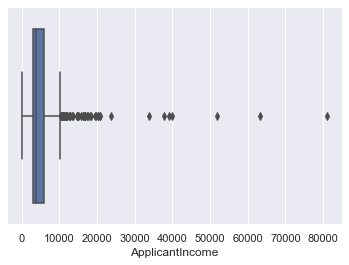

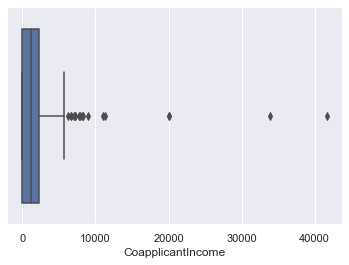

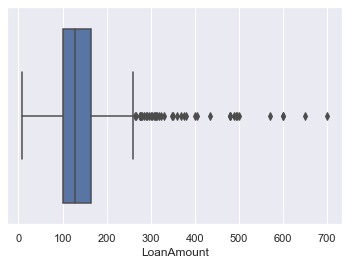

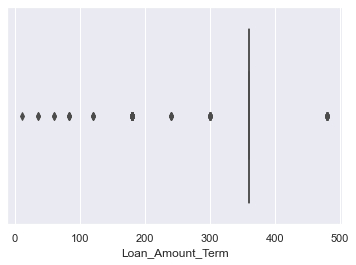

In [110]:
for i in float_type:
    plt.figure()
    sns.boxplot(df[i])

In [111]:
# So, many outliers are present in the each float columns need to work on it
#  in the ApplicantIncome , maximum values lie between 0 to 1000
# High no od outliers are present in the data set


In [112]:
df.columns

# ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
#       dtype='object')

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Check skewness of the columns

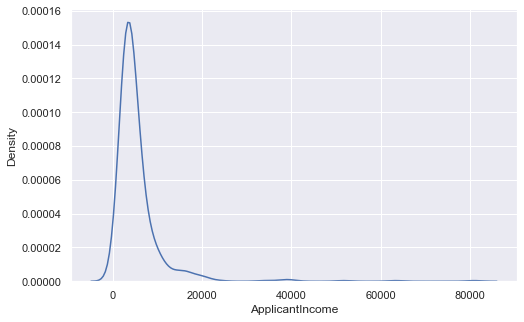

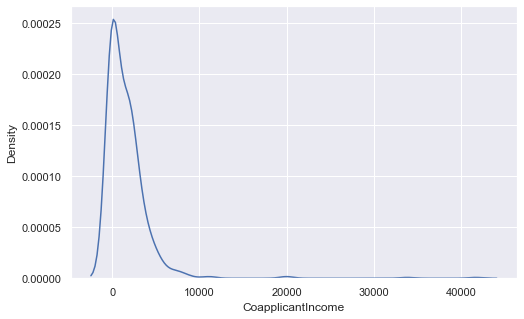

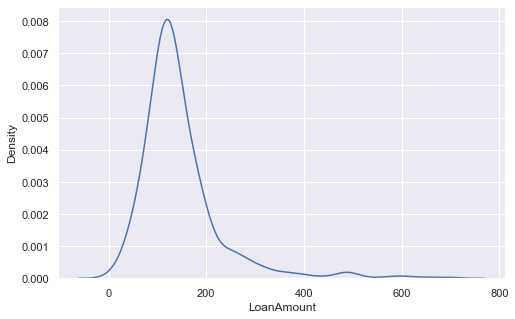

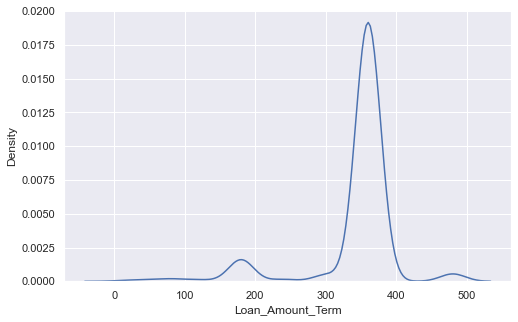

In [113]:
for i in float_type:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i], color = 'b', hist = False)

### Distribution of Columns

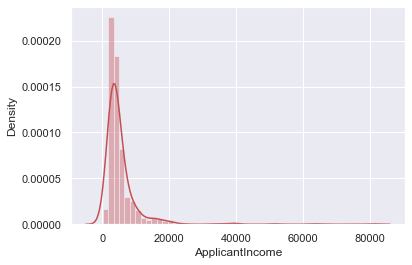

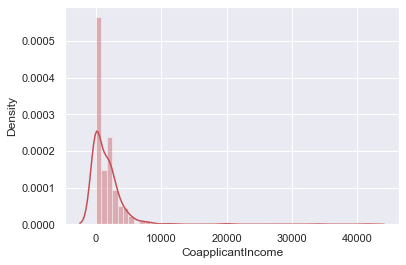

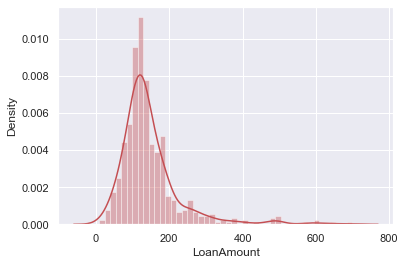

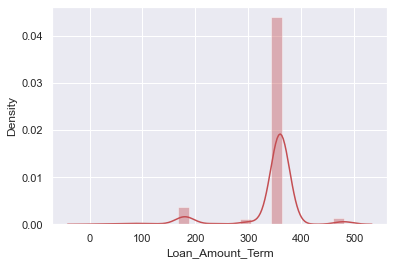

In [114]:
for i in float_type:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [115]:
# 1. maximum value of Application column is having data in range of 0 to 2000 and none of the column is normally distributed
# 2. CoapplicantIncome is not normally distributed
# 3. No column is having normally distribution 
# 4. Loan amount term column having both side outliers need to rmove these

### Spread of Columns

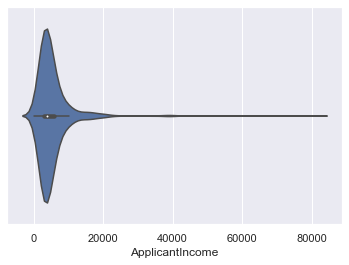

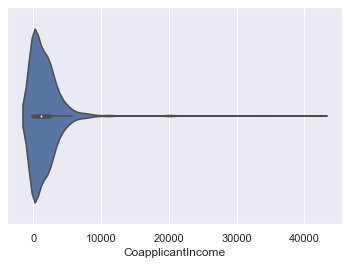

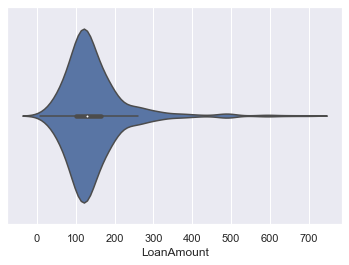

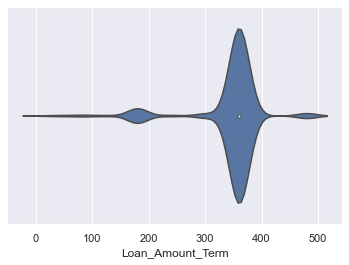

In [116]:
for i in float_type:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [117]:
# As we can see, sobserved columns are not much spreaded

### Knowing the pattern of data

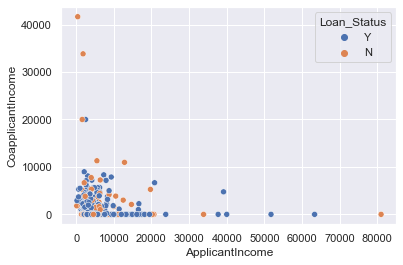

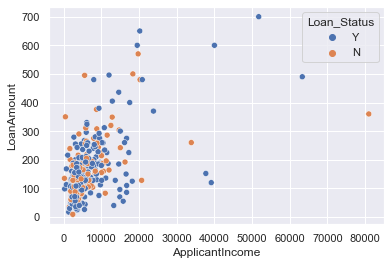

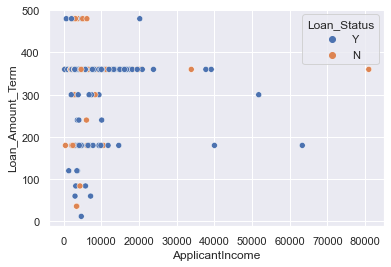

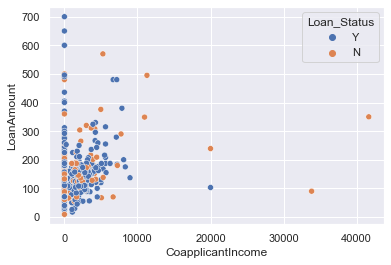

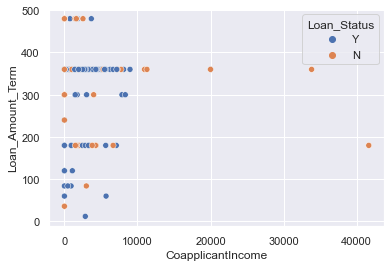

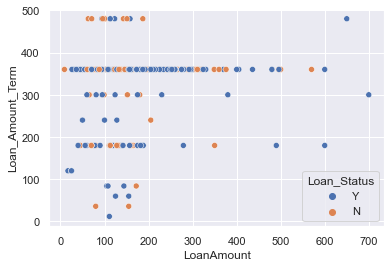

In [118]:
for i in range(len(float_type)):

    for j in float_type[i+1:]:    
        plt.figure()
        sns.scatterplot(df[float_type[i]], df[j], hue = df['Loan_Status'])

In [119]:
# LoanAmount and ApplicantIncome is showong some linear relation
# LoanAmount and coapplicant income columns are also showing linear relation with each other
 # other than these columns, match no dount
    

In [120]:
# for i in range(len(int_col)):

#     for j in int_col[i+1:]:    
#         plt.figure()
#         sns.lineplot(df[int_col[i]], df[j])

# This line of code taking so much therefore now, will create one by one line plot
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

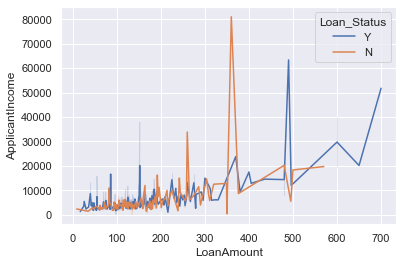

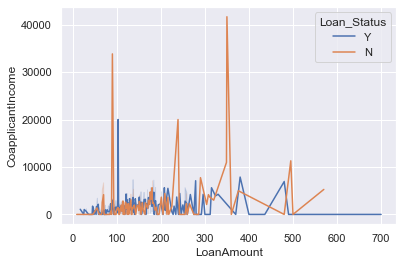

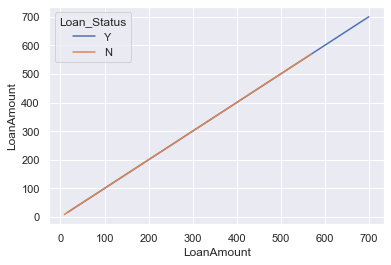

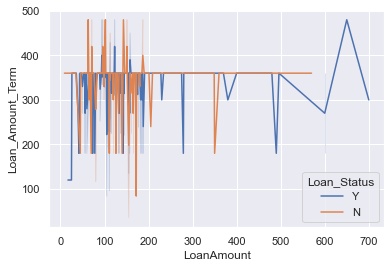

In [121]:
col = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
for i in float_type:
    plt.figure()
    sns.lineplot(x='LoanAmount', y=i, hue='Loan_Status',data=df) 


In [122]:
# No pattern found between columns, only Application income and loan amount is showing some linear relation

### Correlation of the columns

In [123]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

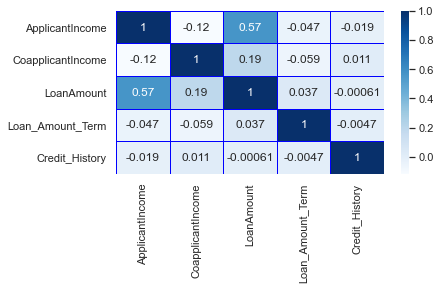

In [124]:
plt.figure(figsize = (6, 3))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [125]:
# As we can see in above visualization not column is showing high correation with another column
# Only LaonAmount column is showing corelation with ApplicationIncome

### Describe Data

In [126]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

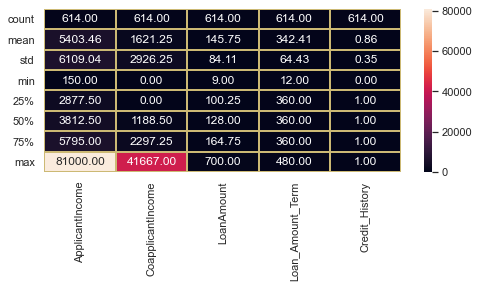

In [127]:
plt.figure(figsize = (8, 3))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [128]:
# We see the differnce between mean and 50 percentile, 
# Application is skewed as it giving high difference between mean and 50 percentile
# Co applicantincome is containing so many outliers that why it is showing high differnce between mean and 50 percentile
# LoanAmount is not showing much difference between mean and 50 percentile
# Loan Amount Team is also showinig high difference between mean and 50 percentile
# As Min and max value are not containing much difference in each columns which is telling that data is not well spreaded
# As per observation, one can say data is skewed

## Encoding

In [129]:
# Credit histiory column is containing only two values 0 and 1 and we can apply OneHot encoding to this 
# column to increase performance of the model
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [130]:
object_col
# ['Gender',
#  'Married',
#  'Dependents',
#  'Education',
#  'Self_Employed',
#  'Property_Area',
#  'Loan_Status',
#  'Credit_History']

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [132]:
from sklearn.preprocessing import LabelEncoder

#### Applying LabelEncoder to the Target Variable (Loan_status)

In [133]:
le = LabelEncoder()

In [134]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Applying to the Label column

In [135]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0


In [136]:
df.Loan_Status.unique() 
# array([1, 0])

array([1, 0])

#### Applying OneHotEncoder to other categorical columns

In [137]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

In [138]:
for i in categorical:
    print(i,'column having ',df[i].nunique(),'values')

# Gender column having  2 values
# Married column having  2 values
# Dependents column having  4 values
# Education column having  2 values
# Self_Employed column having  2 values
# Property_Area column having  3 values
# Credit_History column having  2 values

Gender column having  2 values
Married column having  2 values
Dependents column having  4 values
Education column having  2 values
Self_Employed column having  2 values
Property_Area column having  3 values
Credit_History column having  2 values


In [139]:
encoded_df = pd.get_dummies(df, columns = ['Gender', 'Married', 'Dependents', 'Education', 
                                           'Self_Employed', 'Property_Area', 'Credit_History'])

In [140]:
encoded_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,5849.0,0.0,128.0,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,4583.0,1508.0,128.0,360.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,3000.0,0.0,66.0,360.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
3,2583.0,2358.0,120.0,360.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1
4,6000.0,0.0,141.0,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1


In [141]:
encoded_df.dtypes

# ApplicantIncome            float64
# CoapplicantIncome          float64
# LoanAmount                 float64
# Loan_Amount_Term           float64
# Loan_Status                  int32
# all other encoded columns are of uint8
# Gender_Female                uint8

ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Loan_Status                  int32
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Credit_History_0.0           uint8
Credit_History_1.0           uint8
dtype: object

#### Checking impect of variables to the target variable

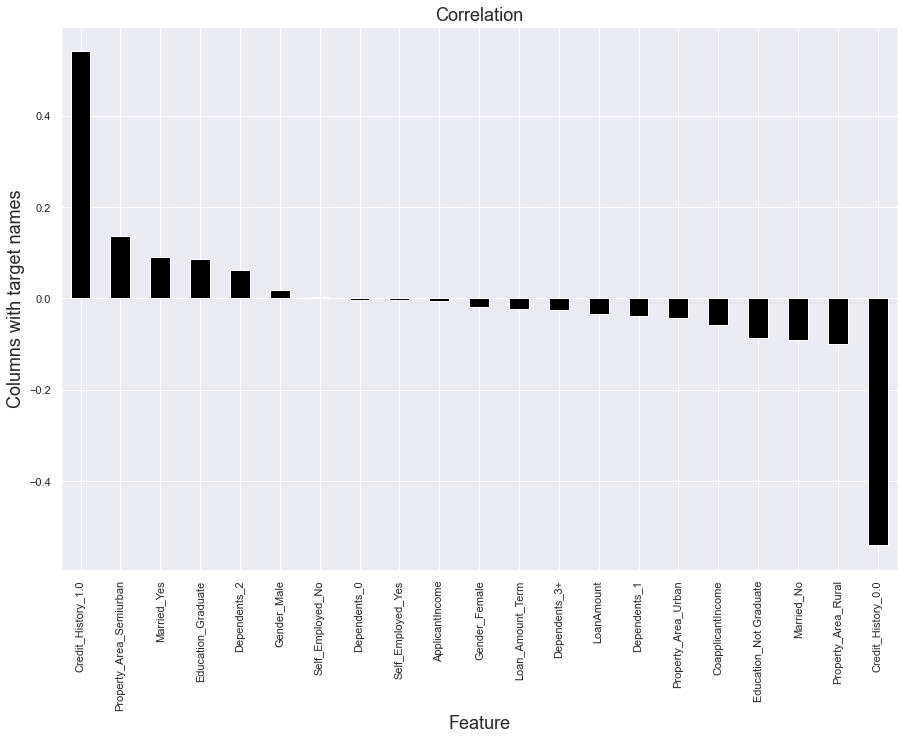

In [142]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [143]:
# Credit History_1.0 play a precious role to get Loan status as yes
# AND credit History_0 impecting negatively to the target variable
# Top three columns which are impacting positive to predict Loan Status
# Credit History, Property Area Semiurban, Married _status
# impact of Dependent_0 column is almost null.
# Property_area_rural, Married No, Education_not_Graduate is impacting negatively to the loan status

### Remove Outliers

##### using zscore technique

In [144]:
from scipy.stats import zscore

In [145]:
# Zscore operation to remove outliers
z = np.abs(zscore(encoded_df) )
df_z = encoded_df[(z < 3).all(axis = 1)] 
df_z.shape

# (533, 22)

(533, 22)

In [146]:
(encoded_df.shape[0] - df_z.shape[0] ) / encoded_df.shape[0]

# 0.13192182410423453  # This method is giving high loss of data
# Can not implement this method to remove outliers

0.13192182410423453

##### Using IQR technique

In [147]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1 

In [148]:
df_IQR = encoded_df[~((encoded_df < (Q1 - 1.5*IQR) ) | (encoded_df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape   
# can not use this method too, as it is also giving high loss of data.
# (136, 22)

(136, 22)

In [149]:
# As both methods zscore and IQR method are giving high loss of data , therefore we will not remove outliers
# and perform preceeding on existing data

In [150]:
encoded_df.shape
# (614, 22)

(614, 22)

In [151]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0


### Seperating Data into x and y form

In [152]:
x = encoded_df.drop(columns = ['Loan_Status'])
y = encoded_df['Loan_Status']

print(x.shape)
print(y.shape)

# (614, 21)
# (614,)

(614, 21)
(614,)


In [153]:
y.unique()

# array([1, 0])

array([1, 0])

### Apply SMOTE Technique to the target variable

In [154]:
y.value_counts()

# 1    422
# 0    192
# Name: Loan_Status, dtype: int64

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

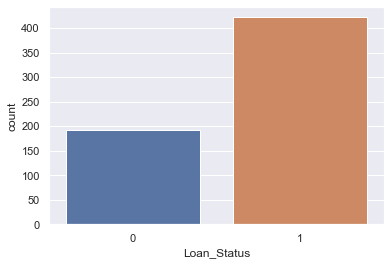

In [155]:
sns.countplot(y)

In [156]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [157]:
x, y = smote.fit_resample(x,y)

In [158]:
y.value_counts()
# 0    422
# 1    422
# Name: Loan_Status, dtype: int64

1    422
0    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

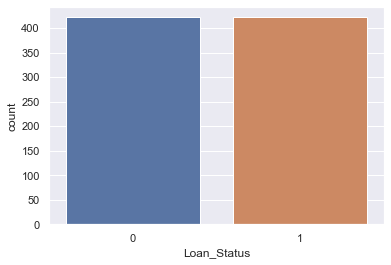

In [159]:
sns.countplot(y)

In [160]:
encoded_df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,5849.0,0.0,128.0,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,4583.0,1508.0,128.0,360.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Remove Skewness

In [161]:
x.skew()

# We have to remove skewness only of float type columns

# ApplicantIncome            6.165329
# CoapplicantIncome          7.289852
# LoanAmount                 2.581978
# Loan_Amount_Term          -2.372376

ApplicantIncome            6.541047
CoapplicantIncome          6.916928
LoanAmount                 2.666480
Loan_Amount_Term          -2.512961
Gender_Female              1.932959
Gender_Male               -1.278466
Married_No                 0.785317
Married_Yes               -0.278009
Dependents_0              -0.104593
Dependents_1               2.280055
Dependents_2               2.296664
Dependents_3+              3.652922
Education_Graduate        -0.996983
Education_Not Graduate     1.596669
Self_Employed_No          -1.822969
Self_Employed_Yes          2.636686
Property_Area_Rural        1.113507
Property_Area_Semiurban    0.881842
Property_Area_Urban        1.010269
Credit_History_0.0         1.870742
Credit_History_1.0        -0.944864
dtype: float64

In [162]:
skewed_col = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ]  
# columns fow which skewness treatment operation have to perform

In [163]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [164]:
x[skewed_col] = pt.fit_transform(x[skewed_col])
# applying to skewed columns of dataset

In [165]:
x.skew()

# ApplicantIncome           -0.112150
# CoapplicantIncome         -0.115950
# LoanAmount                 0.029442
# Loan_Amount_Term           0.407280

ApplicantIncome           -0.060834
CoapplicantIncome         -0.046891
LoanAmount                 0.018084
Loan_Amount_Term           0.395313
Gender_Female              1.932959
Gender_Male               -1.278466
Married_No                 0.785317
Married_Yes               -0.278009
Dependents_0              -0.104593
Dependents_1               2.280055
Dependents_2               2.296664
Dependents_3+              3.652922
Education_Graduate        -0.996983
Education_Not Graduate     1.596669
Self_Employed_No          -1.822969
Self_Employed_Yes          2.636686
Property_Area_Rural        1.113507
Property_Area_Semiurban    0.881842
Property_Area_Urban        1.010269
Credit_History_0.0         1.870742
Credit_History_1.0        -0.944864
dtype: float64

In [166]:
# Every float columns is showing skewness value which is in acceptable range, Now, we move ahead

In [167]:
encoded_df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,5849.0,0.0,128.0,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,4583.0,1508.0,128.0,360.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Multicoliearity

##### Using VIF Technique

In [168]:
# using VIF Technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [170]:
cal_vif(x)

# Columns Name	VIF
# 0	ApplicantIncome	1.977044
# 1	CoapplicantIncome	1.625197
# 2	LoanAmount	1.735202
# 3	Loan_Amount_Term	1.046099
# All VIf Values are in acceptable range...


,Columns Name,VIF
0,ApplicantIncome,1.858596
1,CoapplicantIncome,1.599166
2,LoanAmount,1.684939
3,Loan_Amount_Term,1.055597
4,Gender_Female,3.209520
5,Gender_Male,11.477513
6,Married_No,5.776894
7,Married_Yes,9.874511
8,Dependents_0,7.564685
9,Dependents_1,2.796759


## Scaling

In [171]:
x.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,0.556126,-1.043209,-0.025621,0.169538,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,0.177947,0.819390,-0.025621,0.169538,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [172]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [173]:
scale_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scale_col
# ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [174]:
x[scale_col] = ss.fit_transform(x[scale_col])

In [175]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,0.556126,-1.043209,-0.025621,0.169538,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,0.177947,0.819390,-0.025621,0.169538,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,-0.494059,-1.043209,-1.365390,0.169538,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
3,-0.736038,0.941545,-0.158363,0.169538,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1
4,0.595286,-1.043209,0.174199,0.169538,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1


### Machine Learning

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [177]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0,100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [178]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :-', training)
        print('At random state', i, 'the testing accuracy is :-', testing) 
        print('_________________________________________________________________')

In [179]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is : ', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
    print('Cross value score')
    
    # perform cross-validation
    for i in range(4, 12):
        cv_score = cross_val_score(model, x, y, cv = i ).mean()
        print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1: LogisticRegression

In [180]:
best_fit1 = best_randomstate (LogisticRegression, x, y)
print(best_fit1)

[3, 7, 11, 19, 27, 31, 44, 88]


In [181]:
check_model(LogisticRegression, x, y, best_fit1)

At random state 3 the training accuracy is :- 0.8491525423728814
At random state 3 the testing accuracy is :- 0.8503937007874016
_________________________________________________________________
At random state 7 the training accuracy is :- 0.8542372881355932
At random state 7 the testing accuracy is :- 0.8503937007874016
_________________________________________________________________
At random state 11 the training accuracy is :- 0.8542372881355932
At random state 11 the testing accuracy is :- 0.8464566929133859
_________________________________________________________________
At random state 19 the training accuracy is :- 0.8542372881355932
At random state 19 the testing accuracy is :- 0.8503937007874016
_________________________________________________________________
At random state 27 the training accuracy is :- 0.8525423728813559
At random state 27 the testing accuracy is :- 0.8543307086614174
_________________________________________________________________
At random state 31 

In [182]:
train(LogisticRegression, x, y, 78)

Training accuracy is :  0.8559322033898306
Testing accuracy is : 0.8503937007874016
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.98      0.82        91
           1       0.98      0.78      0.87       163

    accuracy                           0.85       254
   macro avg       0.85      0.88      0.85       254
weighted avg       0.89      0.85      0.85       254

Confusion Matrix: 
 [[ 89   2]
 [ 36 127]]
___________________________________________________________________
Cross value score
cv score 0.8341232227488151 at 4 cross fold
cv score 0.8377993801070724 at 5 cross fold
cv score 0.8403157716987505 at 6 cross fold
cv score 0.8428177882723338 at 7 cross fold
cv score 0.8382300089847259 at 8 cross fold
cv score 0.8402730115152902 at 9 cross fold
cv score 0.843109243697479 at 10 cross fold
cv score 0.845165599950289 at 11 cross fold


In [183]:
# Model is giving Training Accuracy:0.855932
# Testing accuracy: 0.8503937
# And CV value of: 0.845165 at Cross fold 11

#### Model 2: SVC

In [184]:
from sklearn.svm import SVC 

In [185]:
best_fit2 = best_randomstate (SVC, x, y)
best_fit2

[24, 39, 63, 64, 96]

In [186]:
check_model(SVC, x, y, best_fit2)

At random state 24 the training accuracy is :- 0.8593220338983051
At random state 24 the testing accuracy is :- 0.8582677165354331
_________________________________________________________________
At random state 39 the training accuracy is :- 0.8694915254237288
At random state 39 the testing accuracy is :- 0.8661417322834646
_________________________________________________________________
At random state 63 the training accuracy is :- 0.8627118644067797
At random state 63 the testing accuracy is :- 0.8582677165354331
_________________________________________________________________
At random state 64 the training accuracy is :- 0.8627118644067797
At random state 64 the testing accuracy is :- 0.8582677165354331
_________________________________________________________________
At random state 96 the training accuracy is :- 0.8677966101694915
At random state 96 the testing accuracy is :- 0.8700787401574803
_________________________________________________________________


In [187]:
# SVC is giving best Accuracy at random state 39

In [188]:
train(SVC, x, y, 39)

Training accuracy is :  0.8694915254237288
Testing accuracy is : 0.8661417322834646
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        94
           1       0.96      0.82      0.89       160

    accuracy                           0.87       254
   macro avg       0.86      0.88      0.86       254
weighted avg       0.88      0.87      0.87       254

Confusion Matrix: 
 [[ 88   6]
 [ 28 132]]
___________________________________________________________________
Cross value score
cv score 0.8364928909952607 at 4 cross fold
cv score 0.8401451112989575 at 5 cross fold
cv score 0.8438280986153327 at 6 cross fold
cv score 0.8403876426603699 at 7 cross fold
cv score 0.8476078167115902 at 8 cross fold
cv score 0.8461704669666235 at 9 cross fold
cv score 0.8454201680672269 at 10 cross fold
cv score 0.847495805629777 at 11 cross fold


In [189]:
# Accuracy of Training Data: 0.869491
# Accuracy of Testing Data: 0.866141
# Highest CV score 0.847607 at cross fold 8

#### Model 3: DecisionTreeClassifier

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
best_fit3 = best_randomstate (DecisionTreeClassifier, x, y)
best_fit3

[]

In [192]:
# As best fit is null mean, this model will give either Overfitted model or Underfitted model
check_model(DecisionTreeClassifier, x, y, range(61, 100))

At random state 61 the training accuracy is :- 1.0
At random state 61 the testing accuracy is :- 0.7913385826771654
_________________________________________________________________
At random state 62 the training accuracy is :- 1.0
At random state 62 the testing accuracy is :- 0.8228346456692913
_________________________________________________________________
At random state 63 the training accuracy is :- 1.0
At random state 63 the testing accuracy is :- 0.8031496062992126
_________________________________________________________________
At random state 64 the training accuracy is :- 1.0
At random state 64 the testing accuracy is :- 0.8070866141732284
_________________________________________________________________
At random state 65 the training accuracy is :- 1.0
At random state 65 the testing accuracy is :- 0.7677165354330708
_________________________________________________________________
At random state 66 the training accuracy is :- 1.0
At random state 66 the testing accuracy

In [193]:
# Model is giving maxium accuracy of 82% at random state of 82

In [195]:
train(DecisionTreeClassifier, x, y, 96)

Training accuracy is :  1.0
Testing accuracy is : 0.8188976377952756
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       124
           1       0.83      0.81      0.82       130

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254

Confusion Matrix: 
 [[103  21]
 [ 25 105]]
___________________________________________________________________
Cross value score
cv score 0.7796208530805688 at 4 cross fold
cv score 0.7808467173851789 at 5 cross fold
cv score 0.7797028031070585 at 6 cross fold
cv score 0.7716155057064148 at 7 cross fold
cv score 0.7859725965858041 at 8 cross fold
cv score 0.790487811078065 at 9 cross fold
cv score 0.7837955182072829 at 10 cross fold
cv score 0.7857764245324055 at 11 cross fold


In [196]:
# Accuracy of Training dataset: 1.0
# Accuracy of Training Dataset: 0.818897
# Maximum value of CV is 0.790487 at cross fold 9
# Accuracy of Training > Accuracy of Testing (means overfitted model)

# As we are getting so much difference between Accuracy of Training and test data, therefore we can not select this model as
# final model

### Model 4:  RandomForestClassifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
best_fit4 = best_randomstate (RandomForestClassifier, x, y)
best_fit4

[]

In [199]:
# As best_fit is empty means, this model will give either overfitted model or underfitted model

check_model(RandomForestClassifier, x, y, range(1, 100) )

At random state 1 the training accuracy is :- 1.0
At random state 1 the testing accuracy is :- 0.8070866141732284
_________________________________________________________________
At random state 2 the training accuracy is :- 1.0
At random state 2 the testing accuracy is :- 0.8543307086614174
_________________________________________________________________
At random state 3 the training accuracy is :- 1.0
At random state 3 the testing accuracy is :- 0.8622047244094488
_________________________________________________________________
At random state 4 the training accuracy is :- 1.0
At random state 4 the testing accuracy is :- 0.8543307086614174
_________________________________________________________________
At random state 5 the training accuracy is :- 1.0
At random state 5 the testing accuracy is :- 0.8385826771653543
_________________________________________________________________
At random state 6 the training accuracy is :- 1.0
At random state 6 the testing accuracy is :- 0.811

At random state 47 the training accuracy is :- 1.0
At random state 47 the testing accuracy is :- 0.8582677165354331
_________________________________________________________________
At random state 48 the training accuracy is :- 1.0
At random state 48 the testing accuracy is :- 0.8110236220472441
_________________________________________________________________
At random state 49 the training accuracy is :- 1.0
At random state 49 the testing accuracy is :- 0.8582677165354331
_________________________________________________________________
At random state 50 the training accuracy is :- 1.0
At random state 50 the testing accuracy is :- 0.8346456692913385
_________________________________________________________________
At random state 51 the training accuracy is :- 1.0
At random state 51 the testing accuracy is :- 0.8385826771653543
_________________________________________________________________
At random state 52 the training accuracy is :- 1.0
At random state 52 the testing accuracy

At random state 93 the training accuracy is :- 1.0
At random state 93 the testing accuracy is :- 0.8307086614173228
_________________________________________________________________
At random state 94 the training accuracy is :- 1.0
At random state 94 the testing accuracy is :- 0.84251968503937
_________________________________________________________________
At random state 95 the training accuracy is :- 1.0
At random state 95 the testing accuracy is :- 0.8267716535433071
_________________________________________________________________
At random state 96 the training accuracy is :- 1.0
At random state 96 the testing accuracy is :- 0.8622047244094488
_________________________________________________________________
At random state 97 the training accuracy is :- 1.0
At random state 97 the testing accuracy is :- 0.8346456692913385
_________________________________________________________________
At random state 98 the training accuracy is :- 1.0
At random state 98 the testing accuracy i

In [202]:
# As model is giving highest accuracy at random state 45
train(RandomForestClassifier, x, y, 45)

Training accuracy is :  1.0
Testing accuracy is : 0.8818897637795275
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       103
           1       0.95      0.85      0.90       151

    accuracy                           0.88       254
   macro avg       0.88      0.89      0.88       254
weighted avg       0.89      0.88      0.88       254

Confusion Matrix: 
 [[ 96   7]
 [ 23 128]]
___________________________________________________________________
Cross value score
cv score 0.8317535545023698 at 4 cross fold
cv score 0.8342490842490843 at 5 cross fold
cv score 0.842646065518406 at 6 cross fold
cv score 0.8451397087760724 at 7 cross fold
cv score 0.847562893081761 at 8 cross fold
cv score 0.8450265639695975 at 9 cross fold
cv score 0.8429411764705883 at 10 cross fold
cv score 0.8416236873174672 at 11 cross fold


In [203]:
# Maximum cross value 0.847562 at cross fold 8
# Acurracy of training data is 1.0
# Accuracy of testiing data is 0.8818897
# Accuracy of training > Accuracy of Testing  (overfitted model)

# This Algorithm is giving overfitted model, therefore we cannot use this model for final model building

In [210]:
# # Observation 

# Models	                Training Accuracy	Testing Accuracy	CV	               Difference
# LogisticRegression	    0.855932	        0.8503937	        0.845165	       0.005229
# SVC	                    0.869491	        0.866141	        0.847607	       0.018534
# DecisionTreeClassifier	1	                0.818897	        0.790487	       0.02841
# RandomForestClassifier	1	                0.881889	        0.847562	       0.034327

In [211]:
# As we can observed, least difference of cv and testing accuracy is 0.008029, by LogisticRegression,
# And Accuracy of testing data is almost equal to accuray of testing data.
# Therefore, we will perform further proceedings onto Logistic model for model building

### Final Model (LogisticRegression)

##### Ensemble Technique

In [212]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 78)

# Logistice is givng good accuracy (0.8582) at random state 78  and highest cv = 0.850238  at cross fold 10
# Therefore, we will use these values for further proceedings 10

#### Hyper Parameter Tuning

In [213]:
parameter = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'max_iter' : [100, 150, 200], 
            'multi_class' : ['auto', 'ovr', 'multinomial']}

In [215]:
gcv = GridSearchCV(estimator = LogisticRegression(), param_grid = parameter, cv = 11)
gcv.fit(x_train, y_train)

# GridSearchCV(cv=10, estimator=LogisticRegression(),
#              param_grid={'max_iter': [100, 150, 200],
#                          'multi_class': ['auto', 'ovr', 'multinomial'],
#                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
#                                     'saga']})

GridSearchCV(cv=11, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [217]:
gcv.best_params_

# {'max_iter': 100,
#  'multi_class': 'auto',
#  'penalty': 'none',
#  'solver': 'newton-cg'}

{'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'none',
 'solver': 'newton-cg'}

##### Selection of paramenter and random_state to avoid over fitted and under fitted model

In [218]:
best_fit = []
for i in range(0, 100) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    m = LogisticRegression(max_iter = 100, multi_class = 'auto', penalty = 'none', solver = 'newton-cg')
    m.fit(x_train, y_train)
    m_predict_train = m.predict(x_train)
    m_predict_test = m.predict(x_test)

    training = accuracy_score(m_predict_train, y_train)
    testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

    if np.abs(round(training, 2) - round(testing, 2)) < 0.005:
        best_fit.append(i)


In [219]:
print(best_fit)

[1, 7, 19, 27, 60, 78, 88, 98]


In [222]:
max_acc = 0
random_s = 0

for i in best_fit:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = LogisticRegression(max_iter = 100, multi_class = 'auto', penalty = 'none', solver = 'newton-cg')
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8622047244094488 on random state of 98


### Final Model using LogisticRegression

In [225]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 98)
final_model = LogisticRegression(max_iter = 100, multi_class = 'auto', penalty = 'none', solver = 'newton-cg')
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('At random state', i, 'the training accuracy is :-', training)
print('At random state', i, 'the testing accuracy is :-', testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')
print('Cross value score')
    
    
    # perform cross-validation
for i in range(4, 12):
    cv_score = cross_val_score(model, x, y, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

At random state 11 the training accuracy is :- 0.8593220338983051
At random state 11 the testing accuracy is :- 0.8622047244094488
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.97      0.83        91
           1       0.98      0.80      0.88       163

    accuracy                           0.86       254
   macro avg       0.86      0.89      0.86       254
weighted avg       0.89      0.86      0.86       254

Confusion Matrix: 
 [[ 88   3]
 [ 32 131]]
___________________________________________________________________
Cross value score
cv score 0.8459715639810427 at 4 cross fold
cv score 0.8472879684418146 at 5 cross fold
cv score 0.8474332995609591 at 6 cross fold
cv score 0.8511511216056669 at 7 cross fold
cv score 0.8465633423180592 at 8 cross fold
cv score 0.8474160502300516 at 9 cross fold
cv score 0.8526330532212885 at 10 cross fold
cv score 0.85

In [227]:
# As we can see final model is giving training accuracy of 0.859322 and testing accuracy of 0.862204
# Almost same accuracy of training and testing datast
# And we can see, highest value of cv is 0.852633 near to our model accuracy 

# After applying grid search cv accuracy have increased by 1

### AOC - ROC Curve (Loan Status :  Yes)

In [228]:
final_pred_prob = final_model.predict_proba( x_test)[:, 1]  #  probability of getting 1

# Yes (1) : Loan Status
# No (0) : Loan Status

In [229]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
#  By the use of fpr and tpr we create AUC ROC curve

In [230]:
# fpr
# tpr
# threshols

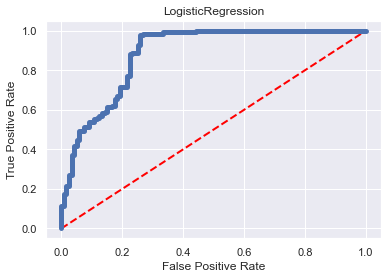

In [231]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('LogisticRegression')  # Title
plt.show()

In [ ]:
# As our model is giving accuracy of 0.86 % , therefore, curve is not sharp

### AOC - ROC Curve (Loan Status :  No)

In [233]:
final_pred_prob = final_model.predict_proba( x_test)[:, 0]  #  probability of getting 1

# Yes (1) : Loan Status
# No (0) : Loan Status

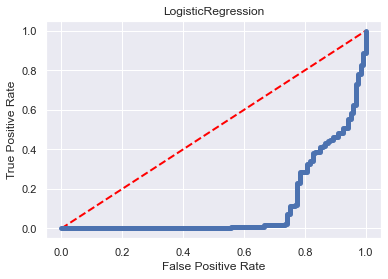

In [234]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('LogisticRegression')  # Title
plt.show()

In [235]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

# 0.8554726368159205

0.8554726368159205

### Deploy Model

In [236]:
import pickle
filename = 'Loan_status_prediction.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [238]:
load_model =  pickle.load(open('Loan_status_prediction.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

# 0.8622047244094488

0.8622047244094488


### Conclusion

In [239]:
original_status = np.array(y_test)
predicted_status = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [241]:
print(predicted_status.shape)
print(original_status.shape)
print(x_test.shape)
print(y_test.shape)

# (254,)
# (254,)
# (254, 21)
# (254,)

(254,)
(254,)
(254, 21)
(254,)


In [242]:
conclusion = pd.DataFrame({'Original Attrition': original_status, 'Predicted Attrition': predicted_status}, index = range(len(original_status)))
# Dataframe creation

In [243]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.head()

,Original Attrition,Predicted Attrition
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1


In [250]:
conclusion.sample(10)

,Original Attrition,Predicted Attrition
84,1,1
225,1,1
57,1,1
114,0,0
181,1,1
250,1,1
103,1,1
247,1,1
74,1,1
179,0,0


In [251]:
conclusion.tail()

,Original Attrition,Predicted Attrition
249,0,0
250,1,1
251,0,0
252,0,0
253,0,1
